# Bayesian analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]

Here are some latex definitions for later convenience. 
$$\newcommand{\lbl}[2]{{#1}^{(#2)}}$$
$$\newcommand{\no}{n^{(1)}}$$
$$\newcommand{\nz}{n^{(0)}}$$

## Training (Naive) Bayes

As we have shown in the previous lectures training a Bayes classifier amounts to finding the conditional probability distributions of the features $\mathbf{x}$ given the class label $c$. 

$$P(\mathbf{X}=\mathbf{x}|C=c)$$

In case of the Naive bayes classifier the features are conditionally independent 

$$P(\mathbf{X}=\mathbf{x}|C=c)=\prod_{i}P(X_i=x_i|C=c)$$

so we can estimate   probality distribution  for each feature separately. 

## Statistics 

Estimating parameters of the probability distribution  from samples drawn from that distribution is the domain of the statistics. We have already used the maximal likelihood estimator in case of the normal distribution while training the "sex form height & bmi"  classifier. In this notebook I will concentrate  on estimating parameters of discrete (categorical) features distribution.  I will use this oportunity to introduce  Bayesian data analysis. 

## Coin toss

We will start with binary features. To be more specyfic you can imagine a series of $n$ coin tosses and treat head as success. The $\no$ is the number of heads and $\nz$ is the number of tails. Please take a coin and throw it now 10 times and count $\no$ and $\nz$. 

Given those numbers how  would you estimate the probability of heads $p$ ? You will be probably tempted to use 

$$p = \frac{\no}{\nz+\no}$$

This is not a bad choice but requires few comments. First let's recall how this results is obtained. 

As we already know $P(\nz, \no|p)$ considered as a function of $\nz$  and $\no$ is a probability distribution also called a _sampling_ distribution. 
However when considered as a function of $p$ is it called _likelihood_

$$L(p|n^0, n^1) = P(n^0,n^1|p) = \binom{n^0+n^1}{n^1}p^{n^1}(1-p)^{n^0}$$

__Maximal likelihood__

Now we can choose $p$ as the number that maximises this quantity. Actually when dealing with probabilities it's often more convenient to use logarithms. Logarithm is a monotonicaly increasing funcion, so the maximum of logarithm of an function will correspond to maximum of the function. 

$$\log P(n^0,n^1|p) = \log\binom{n^0+n^1}{n^1}+\log p^{n^1}+\log (1-p)^{n^0} =  \log\binom{n^0+n^1}{n^1}+n^1\log p+{n^0}\log (1-p)$$

Differentiating this expression with respect to $p$ we obtain equation for minimum:

$$\frac{n^1}{p}-\frac{n^0}{1-p}=0$$

Leading to the result stated above. 

$$P(p|n^1, n^0)$$

This approach works, the estimator is _consistent_, that is as the number of tosses goes to infinity its value will converge to the true value  of $p$. However it has some problems.


 

First of all the likelihood has no clear interpretation. This is NOT a probability distribution on $p$ ! Ideally we would like to have the distribution

which can be interpreted as probability of $p$ given the measured $\nz$ amd $\no$. 

Secondly with maximal likelihood estimator there is no clear way of estimating the error on the $p$. 

And thirdly we do not have a way of incorporating our prior knowledge. For example when tossing a coin we are practically sure that $p=1/2$. If we toss the coin and get  values

In [3]:
tosses = np.asarray([0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

we will rather not conclude that $p=0.6$ as indicated by the data 

In [4]:
n=len(tosses)
n1 = tosses.sum()
n0 = n-n1 
p_est = n1/n
print(p_est)

0.6


We would need much more evidence  to overcome our _prior_ knowledge about a normal coin. 

Actually in case of 10 tosses we have only 25% chance of geting $p$ exactly right. 

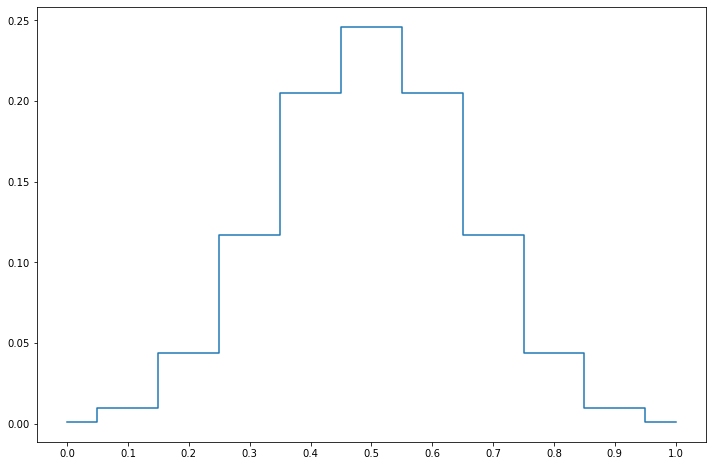

In [5]:
plt.plot(np.arange(11)/10,st.binom(10,0.5).pmf(np.arange(11)), drawstyle = 'steps-mid' );
plt.xticks(np.arange(11)/10);

In extreme case we can get $n^{(1)}=0$ and conclude that succes is impossible, skewing the classifier. This seems unlikely but consider that if all of the 1000 students  at our faculty throw the coin 10 times. Probability that at least one of them tosses ten  tails in a row is

$$ 1 - (1-p^{10})^{1000} $$

In [6]:
1-(1-0.5**(10.0))**1000

0.623576201943276

so not that small. In practical applications for some features $p$ can be very small and the probability of zero successes in our sample is big. 

## Bayesian analysis

Those issues are addressed by the Bayesian statistics. In this approach we concentrate on finding the posterior probability distribution of $p$ given the observed outcomes. 

### Posterior

Bayes theorem gives us a more systematic way of estimating $p$. Recall that:

$$P(p|n^1,n^0) =  \frac{P(n^1,n^0|p) P(p)}{P(n^1,n^0)} = \frac{P(n^1,n^0|p) P(p)}{\int_0^1\text{d}p P(n^1,n^0|p) P(p)} $$

This is called _posterior_ probability refering to the fact that it is calculated after we have collected the data. It represents our knowledge of $p$ after we have collected some evidence. 

### Prior

The first factor in the numerator is the likelihood/sampling distribution. The second factor 

$$P(p)$$

is more problematic. This is  _a priori_ probability of the probability of succes $p$ usually caled "prior". What does that mean ? According to Bayesians this is our degree of belief about $p$ before we see any data. I agree that this is vague, but that's the best we can do. This maybe very subjective but at least that subjectivity is stated openly. Anyway when we gather enough data the prior will not matter. If we do not have data we have to guess anyway :) The Bayes theorem gives us a way of changing our beliefs (probability distribution) according to the data collected. 

Sometimes the prior  maybe well defined. In principle we could take thousands  of coins and toss them milions of times measuring $p$. Then we could get the distribution of $p$ due to manufacturing defects. The same could be said for any other object that in principle can be produced in many copies. 

So imagine that we have coins produced by some sloppy blacksmith. We have one of such coins and we want to estimate $p$. We have previously examined many such coins so we have some idea how the  $P(p)$ distribution looks like. 

#### Beta distribution

The only paractical way of specfying a continous probability distribution is by giving a formula for the probability density function, usually parametrised by few parameters. In case of binary features the most convenient distribution is
he  [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution). It  has two parameters $\alpha$ and $\beta$  and its probability density function is

$$P(x|\alpha,\beta) =  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
x^{\alpha-1}(1-x)^{\beta-1},\quad 0\leq x\leq 1
$$

Here are plots of the probability density function for some values of $\alpha=\beta$

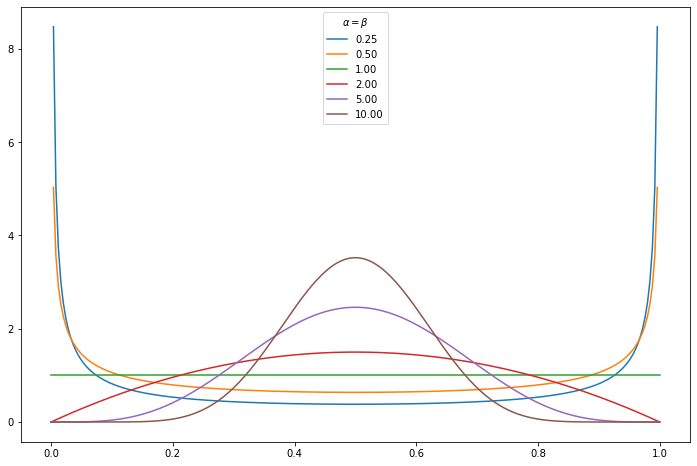

In [7]:
xs =np.linspace(0,1,250)
for a in [0.25,0.5,1,2,5,10]:
    ys = st.beta(a,a).pdf(xs)
    plt.plot(xs,ys, label='%4.2f' %(a,))
plt.legend(loc='best', title='$\\alpha=\\beta$');

And here for some values of $\alpha\neq\beta$

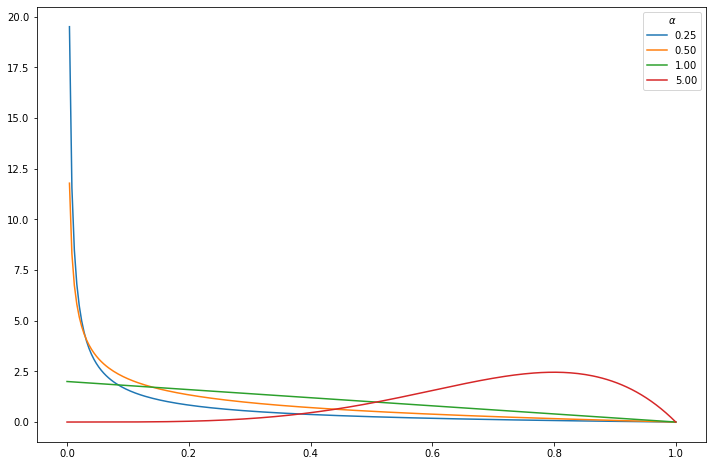

In [8]:
xs =np.linspace(0,1,250)
for a in [0.25,0.5,1,5]:
    ys = st.beta(a,2.0).pdf(xs)
    plt.plot(xs,ys, label='%4.2f' %(a,))
plt.legend(loc=1, title='$\\alpha$');

It can be more convenient to parametrise  Beta distribution by its mean and variance. The mean and variance of Beta distribution are 

$$\mu = \frac{\alpha}{\alpha+\beta}\quad\text{and}\quad \sigma^2=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

and so

$$\nu = \left(\frac{\mu(1-\mu)}{\sigma^2}-1\right),\quad \alpha = \mu\nu, \quad
\beta = (1-\mu) \nu,\quad \sigma^2<\mu(1-\mu)$$

In [9]:
def beta_mu_var(mu, s2):
    """Returns Beta distribution object (from scipy.stats) with specified mean and variance"""
    
    nu = mu*(1-mu)/s2 -1
    if nu>0:
        alpha = mu*nu
        beta = (1-mu)*nu
        return st.beta(a=alpha,b=beta)
    else:
        print("s2 must be less then {:6.4f}".format(mu*(1-mu)))

Let's check this

In [10]:
bd = beta_mu_var(0.3, 0.1)
print(bd.mean(), bd.var())

0.3 0.1


### Back to coin toss

So let's assume that the $p$ values of coins produced by our sloppy blacksmith have Beta distribution  with mean $\mu=0.45$ and standard deviation $\sigma=0.1$. 

In [11]:
prior = beta_mu_var(0.45, 0.1*0.1)
pars = prior.kwds
alpha =pars['a']
beta = pars['b']
print("alpha = {:.2f}, beta={:.2f}".format(alpha,beta))

alpha = 10.69, beta=13.06


We will compare this to uniform prior with $\alpha=\beta=1$. This gives a constant probability density function $P(p)=1$

In [12]:
uni_prior = st.beta(1,1)

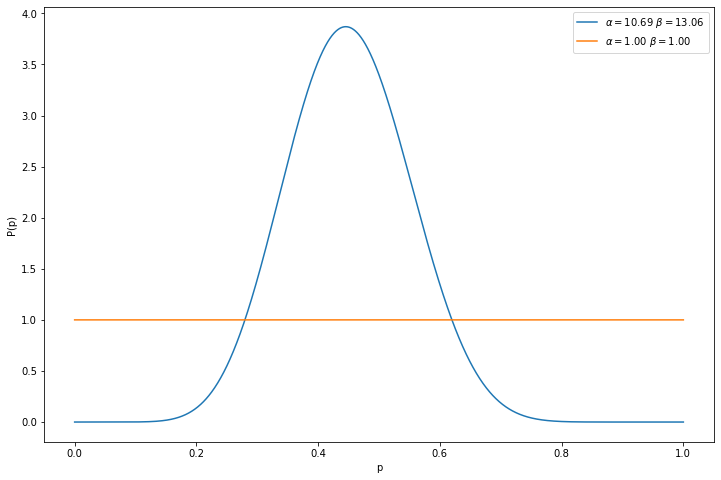

In [13]:
xs =np.linspace(0,1,2000)
plt.plot(xs, prior.pdf(xs),    label="$\\alpha = {:5.2f}$ $\\beta = {:5.2f}$".format(alpha, beta));
plt.plot(xs,uni_prior.pdf(xs), label="$\\alpha = {:5.2f}$ $\\beta = {:5.2f}$".format(1, 1));
plt.xlabel('p');
plt.ylabel('P(p)');
plt.legend();

### Posterior

$$P(p|\nz,\no)=\frac{P(\nz,\no|p)P(p)}{P(\nz,\no)},\qquad P(\nz,\no) = \int\text{d}p\,P(\nz,\no|p)P(p)$$

If we chose $Beta(\alpha, \beta)$ as the prior $P(p)$ the  numerator of the posterior distribution has the form:

$$\binom{\nz+\no}{\no}p^{\no}(1-p)^{\nz}  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
p^{\alpha-1}(1-p)^{\beta-1}$$

The denominator is an integral of the numerator but we don't have to do it explicitely. By noting that 

### Conjugate priors

$$ p^{\no}(1-p)^{\nz} p^{\alpha-1}(1-p)^{\beta-1}=
p^{\no+\alpha-1}(1-p)^{\nz+\beta-1}$$

we see that the functional dependence on $p$ is same as for $Beta(n^1+\alpha, n^0+\beta)$. So this is the same distribution and  finally we have the formula for the posterior 

$$P(p| \nz, \no) \sim  Beta(\no+\alpha, \nz+\beta)$$

So continuing our example let's suppose that real $p$ of our coin is

A prior with a property that the posterior distribution has same form as the prior is called _conjugate_ prior to the sampling distribution. So the Beta distribution is a conjugate prior to Bernouilli distribution. 

In [14]:
p_coin = 0.35

In [15]:
coin = st.bernoulli(p=p_coin)

We will "toss" it 10000 times

In [16]:
n_tosses = 10000
tosses = coin.rvs(n_tosses)

In [17]:
def ht(tosses):
    """Takes a list of toss results and returns number of successes and failures"""
    h = tosses.sum()
    t = len(tosses)-h
    return (h,t)

In [18]:
ht(tosses)

(3420, 6580)

In [19]:
def ab_string(a,b):
    return "$\\alpha = {:.2f}$ $\\beta = {:.2f}$".format(a,b)

def draw_beta_prior(a,b,**kargs):
    xs=np.linspace(0,1,1000)
    plt.plot(xs, st.beta(a,b).pdf(
        xs), **kargs)

def draw_beta_posterior(a,b,tosses, **kargs):
    """Draw posterior distribution after  seing tosses assuming Beta(a,b) prior"""
    (h,t)=ht(tosses)
    xs=np.linspace(0,1,1000)
    plt.plot(xs, st.beta(a+h,b+t).pdf(
        xs), **kargs)

Let's draw the posterior after 10 tosses

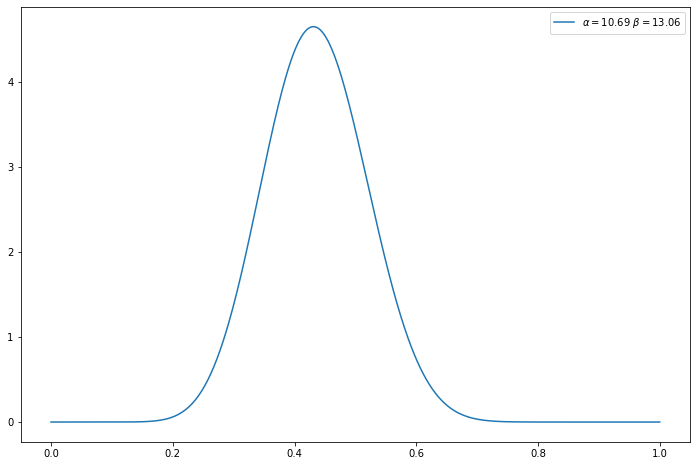

In [20]:
draw_beta_posterior(alpha,beta,tosses[:10], label=ab_string(alpha, beta))
plt.legend();

Let's discuss again what does this probability distribution mean? 

You can thing about it as an outcome of following experiment:
 1. You draw a value for $p$  from the prior distribution
 1. You draw 10 ten times from the Bernoulli distribution with $p$ selected above,  which is equivalent to drawing from Binomial distribution with same $p$  and $n=10$.
 1. You  repeat the two points above noting each time  $p$ and number of successes.
 1. From the results you select only those where number of successes was equal to `tosses[:10].sum()`
 1. The distributiion of $p$ in this selected results should match our posterior!
 
 Let's check this.

In [21]:
def experiment(prior,n,size):
    p = prior.rvs(size=size)
    return np.stack((p,st.binom(n=n, p=p).rvs()), axis=1)

In [22]:
res = experiment(st.beta(alpha, beta),10,1000000)

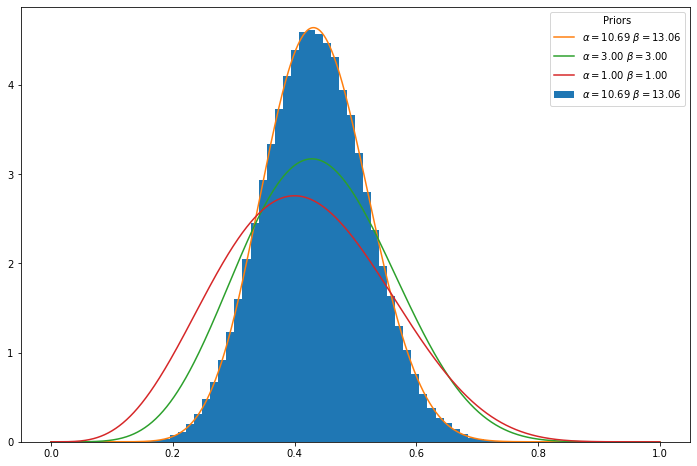

In [23]:
plt.hist(res[res[:,1]==tosses[:10].sum()][:,0], bins=50, density=True, label=ab_string(alpha, beta));
draw_beta_posterior(alpha,beta,tosses[:10], label=ab_string(alpha, beta))
draw_beta_posterior(3,3,tosses[:10], label=ab_string(3, 3))
draw_beta_posterior(1,1,tosses[:10], label=ab_string(1, 1))
plt.legend(title = 'Priors');

As we can see we indeed get the predicted posterior distribution. Unfortunatelly this requires us to get our prior right.

With more data the dependence of the posterior on the prior diminishes

In [24]:
res_100 = experiment(st.beta(alpha, beta),100,1000000)

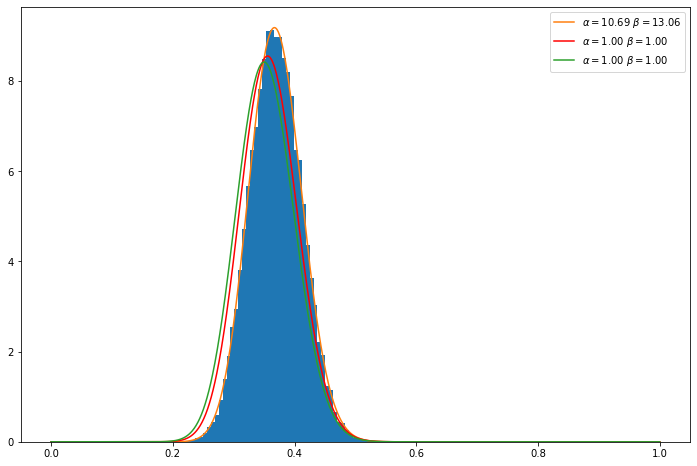

In [25]:
plt.hist(res_100[res_100[:,1]==tosses[:100].sum()][:,0], bins=50, density=True);
draw_beta_posterior(alpha,beta,tosses[:100], label=ab_string(alpha, beta))
draw_beta_posterior(3,3,tosses[:100], label=ab_string(1,1), c='red')
draw_beta_posterior(1,1,tosses[:100], label=ab_string(1,1))
plt.legend();

So let's see how the posterior distribution evolves with increasing number of tosses. Below we draw posterior distribution after different number of tosses

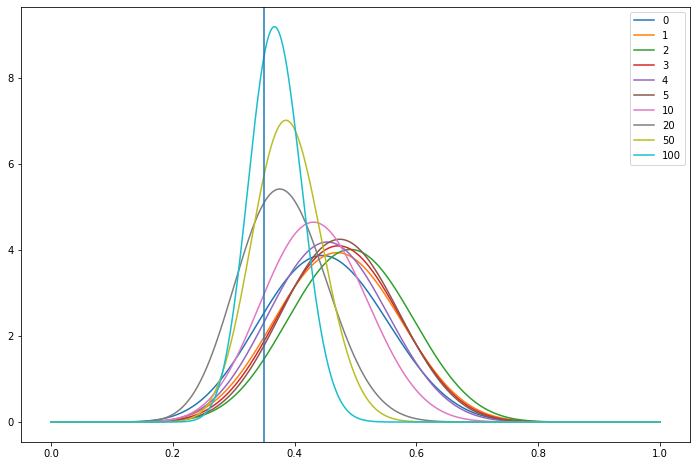

In [26]:
for n in [0, 1,2,3,4,5,10,20,50,100]:
    draw_beta_posterior(alpha,beta,tosses[:n], label="{:d}".format(n))
plt.legend();
plt.axvline(p_coin);

And below after some more tosses

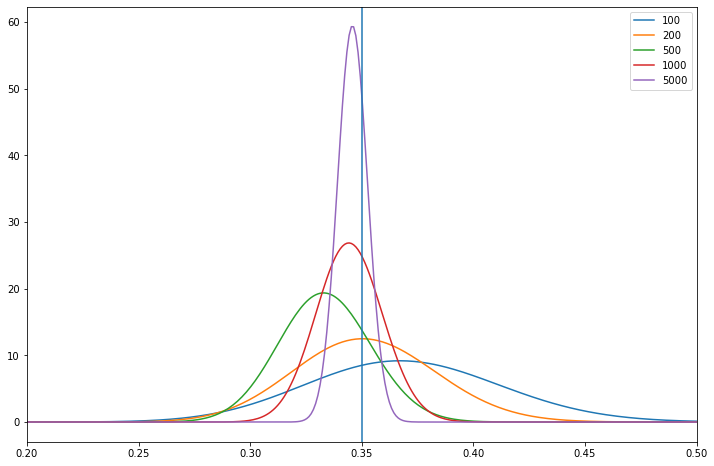

In [27]:
plt.xlim(0.2,0.5)
for n in [100,200,500,1000,5000]:
    draw_beta_posterior(alpha,beta,tosses[:n], label="{:d}".format(n))
plt.legend();
plt.axvline(p_coin);

Let's compare  how the estimated value converges to the real one for different priors. We will use the maximal a posteriori estimate of $p$ 

#### MAP (Maximal a posteriori)

Because mode of the Beta distribution is 

$$\frac{\alpha-1}{\alpha+\beta-2},\qquad \alpha, \beta>1$$

the mode of posterior is:

$$p_{MAP}=\frac{\alpha-1+\no}{\alpha-1+\no+\beta-1+\nz}$$

In [28]:
cs  = np.cumsum(tosses)
ns  = np.arange(1.0, len(cs)+1)
avs = cs/ns
post_avs = (cs + alpha-1)/(ns+alpha+beta -2 )

So adding a Beta prior amounts to adding $\alpha-1$  and $\beta-1$  repectively to  $\no$ and $\nz$. 

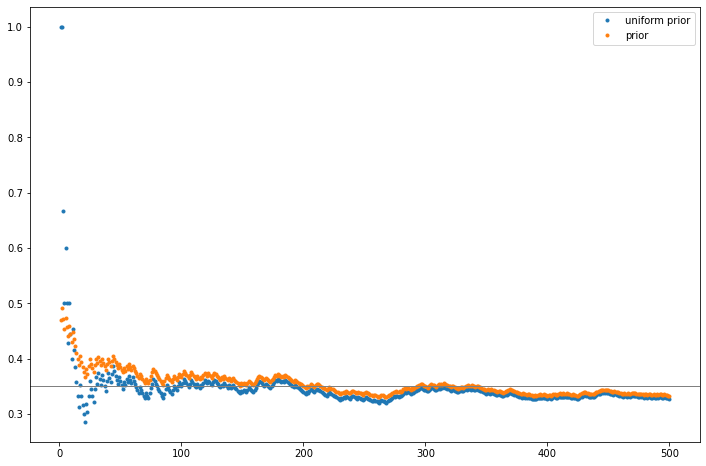

In [29]:
l = 500
plt.plot(ns[:l],avs[:l],'.', label='uniform prior');
plt.plot(ns[:l],post_avs[:l],'.', label='prior');
plt.axhline(p_coin, linewidth=1, c='grey')
plt.legend();

We can see that after few tens/houndreds of tosses both estimate behave in the same way, but with informative prior  we get better results for small number of tosses. 

### Posterior predictive distribution

We can ask what is the probability of the coin comming head up after seing it come head up $\no$ times in $n$ trials? The answer is the integral

$$P(X=1|\no,\nz)=\int\limits_0^1\text{d}p \,P(X=1|p) P(p|\no,\nz) = \int\limits_0^1\text{d}p\, p\, P(p|\no,\nz)$$

which is an expectation value (mean) of the posterior  distribution leading to:

$$P(X=1|\no,\nz)=\frac{\alpha+\no}{\alpha+\no+\beta+\nz}$$

With uniform prior we obtain the so called

#### Laplace Rule of succession

The probability of succes after seing $\no$ successes   and $\nz$ failures  is

$$P(succes) = \frac{\no+1}{\no+\nz +2}$$

This is also known as  _Laplace smoothing_. 

__Problem__  Amazon reviews

You can buy same item from two  sellers one with 90 positive  and 10 negative reviews and another with 6 positive  and no negative reviews.
From which you should buy ? What assumption you had to make?

Let's assume that for each seller sale is  an independent Bernoulli trial with success denoting no problems for the buyer. The other assuption that we are going to make is that all buyers write the reviews.  If so then by the rule of succession probability of success for the first buyer on the next deal is

In [30]:
(90+1)/(100+2)

0.8921568627450981

and for the second

In [31]:
(6+1)/(6+2)

0.875

We should buy from the first. 

## Categorical variables

A natural generalisation of the Bernoulli distribution is the multinouilli or categorical distribution and the generilsation of the binomial distribution is the _multinomial_ distribution. 

Let's say we have $m$ categories with probability $p_k$ for each category. Then after $n$ trials the probability that we $n_k$ results in category $k$ is: 

$$P(n_1,\ldots, n_{m}|p_1,\ldots, p_{m}) = \frac{N!}{n_1!\cdots n_{m}!}p_1^{n_1}\cdots p_{m}^{n_{m}}$$

### Example: Dice

$$m=6,\quad p_i=\frac{1}{6} \qquad P(n_1,\ldots, n_{6}) = \frac{N!}{n_1!\cdots n_{m}!}\frac{1}{6^N}$$

### Dirichlet distribution

Conjugate prior  to this distribution is the Dirichlet distribution which is a generalisation of the Beta distribution. It has $m$ parameters $\alpha_k$ and its probability mass function is

$$P_{Dir}(p_1,\ldots,p_{m}|\alpha_1,\ldots,\alpha_{m}) = \frac{\Gamma\left(\sum\limits_{i=1}^{m} \alpha_i\right)}{\prod\limits_{i=1}^{m}\Gamma(\alpha_i)}
\prod\limits_{i=1}^{m}p_i^{\alpha_i-1}$$

#### Posterior

It is easy to check that the posterior on $p_k$ density is given by the  Dirichet distribution with paramerters $\alpha_1+n_1,\ldots, \alpha_{m}+n_{m}$.

$$P(p_1,\ldots, p_{m}|n_1,\ldots, n_{m})=P_{Dir}(p_1,\ldots,p_{m}|\alpha_1+n_1,\ldots,\alpha_{m}+n_m)$$

The maximal a posteriori estimate is:

$$p_k = \frac{n_k+\alpha_k-1}{n + \sum_i \alpha_k-m}$$

and Laplace smoothing takes the form:

$$p_k = \frac{n_k+1}{\sum_{k=1}^m n_k  + m}$$

You can learn more _.e.g._ from ["Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers). 

## A/B test

This example was taken from Kaggle [Mobile games: A/B Testing](https://www.kaggle.com/yufengsui/mobile-games-ab-testing). It concerns an A/B test with a mobile game [Cookie Cats](https://tactilegames.com/cookie-cats/). The players were given two versions of the game differing by the level were the first gate that forced them to wait was placed. Measured was the retention on day one and  day seven as well as total number of game rounds played  during firts 14 days. 

In [32]:
import pandas as pd

In [33]:
ab_data=pd.read_csv("../../Data/AB/cookie_cats.csv")

In [34]:
ab_data.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


In [35]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [36]:
ab_data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


This descriptions shows a suspiciously large maximum number of  rounds played. Let's look more closely at the distribution

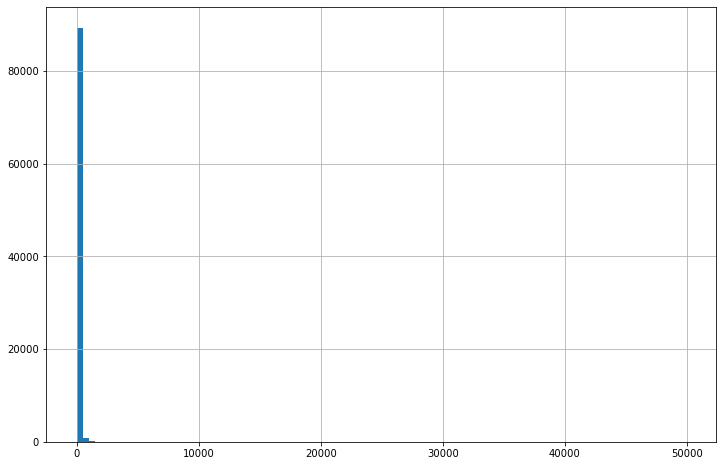

In [37]:
ab_data.sum_gamerounds.hist(bins=100);

The histogram indicated that this is  a outlier, probably an error. A look at ten biggest values confirms that

In [38]:
ab_data.sum_gamerounds.sort_values(ascending=False)[:10]

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
46344     2251
87007     2156
36933     2124
88328     2063
6536      2015
Name: sum_gamerounds, dtype: int64

So we will eliminate this row from the table

In [39]:
imax = ab_data.sum_gamerounds.argmax()
ab_data = ab_data.drop(imax, axis=0) 

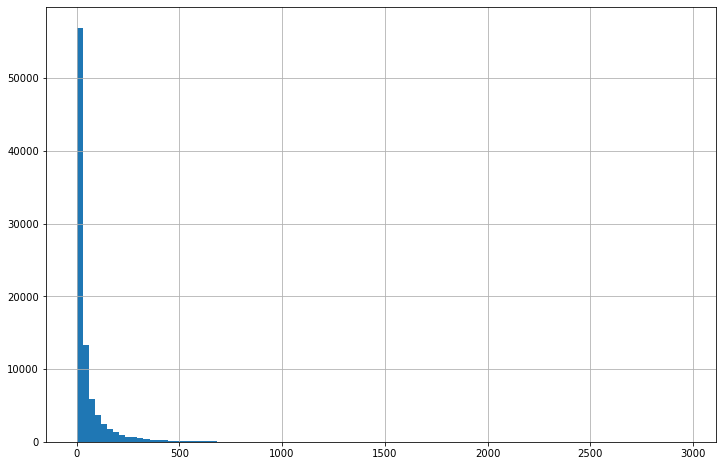

In [40]:
ab_data.sum_gamerounds.hist(bins=100);

After this preliminary cleaning of data we have to split it into two groups according to game version.

In [41]:
by_version = ab_data.groupby('version')

In [42]:
A = by_version.get_group('gate_30')
B = by_version.get_group('gate_40')

In [43]:
def get_stats(series):
    n  = series.count()
    n1 = series.sum()
    return (n1, n-n1)

def posterior(n1, n0, a=1,b=1):
    return st.beta(a = n1+a, b = n0+b)

We will calculate the posterior distribution of of retention rates assuming uniform prior. 

In [44]:
r1_A = get_stats(A.retention_1)
r1_A_post = posterior(*r1_A)
r1_A

(20034, 24665)

In [45]:
r1_B = get_stats(B.retention_1)
r1_B_post = posterior(*r1_B)
r1_B

(20119, 25370)

We can plot those  distributions, first in the whole domain

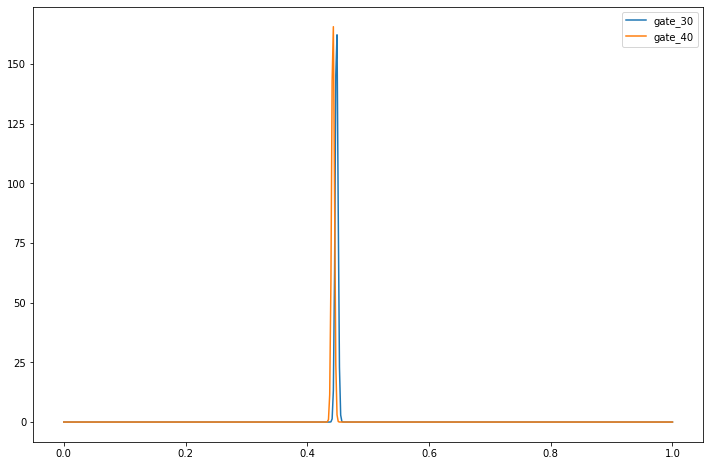

In [46]:
ps=np.linspace(0,1,500)
plt.plot(ps, r1_A_post.pdf(ps), label='gate_30');
plt.plot(ps, r1_B_post.pdf(ps), label='gate_40');
plt.legend();

and then  once we know where to look, in more details

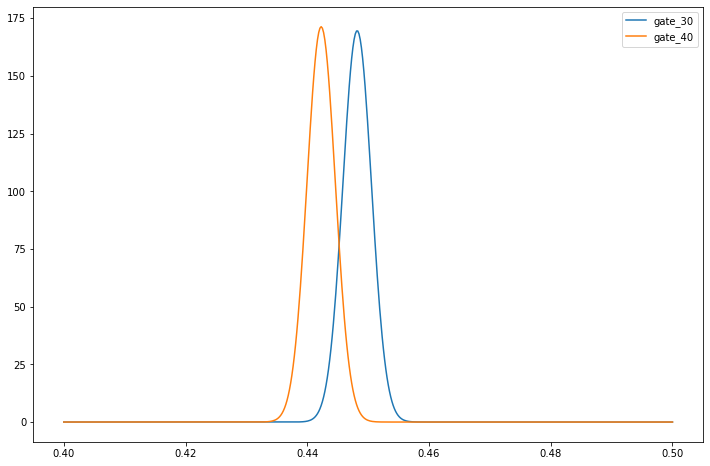

In [47]:
ps=np.linspace(0.4,.5,500)
plt.plot(ps, r1_A_post.pdf(ps),label  = "gate_30");
plt.plot(ps, r1_B_post.pdf(ps), label = "gate_40");
plt.legend();

We see that increasing the first gate level decreased the retention rate on average by

In [48]:
r1_B_post.mean() - r1_A_post.mean()

-0.005914976776531522

which is a one percent effect 

In [49]:
(r1_B_post.mean() - r1_A_post.mean())/r1_A_post.mean()

-0.013197173790253834

I have no idea if effect of this size is relevant for business, but we can ask is it statistically relevant? Because we have the posterior distributions of $r_A$ and $r_B$, one way of answering that question is to sample from distributions of differences:

In [50]:
r1_sample_A = r1_A_post.rvs(size=100000)
r1_sample_B = r1_B_post.rvs(size=100000)
r1_diff = r1_sample_B-r1_sample_A

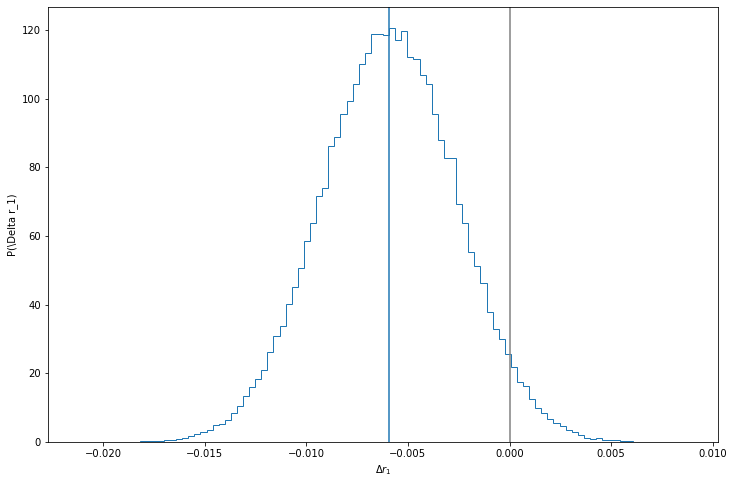

In [51]:
plt.hist(r1_diff, bins=100, density=True, histtype='step');
plt.axvline(r1_diff.mean())
plt.axvline(0, c='grey');
plt.xlabel('$\Delta r_1$')
plt.ylabel('P(\Delta r_1)');

The above histogram strongly suggest that  observed difference is a real effect. We can  formulate this more formally by using  highest density regions (HDR). 

### Highest density region (HDR)

$\beta$ HDR is a region where at least $\beta$ of probability is concentrated and has smallest possible volume in the sample space, hence highest density. More formal definition given below.  

Let $P_X(p)$ be de density function of  some random variable $X$ with values in $R_X$. Let' $R_X(p)$ be the subsets of $R_X$ such  that 

$$ R(p) = \{x\in R_X: P_X(x)\ge p\}$$

The $\beta$ HDR is equal to $R(p_\beta)$ where $p_\beta$ is the largest constant such that

$$P\left(X\in R(p_\beta)\right)\ge \beta$$

Given this definition functions below find and plot such region for given histogram.

In [52]:
def find_edges(prob,f):
    
    pr = np.zeros(len(prob)+2)
    pr[1:-1]=prob
    in_r = pr>f
    return np.logical_xor(in_r[1:] , in_r[:-1])
    

def hdr(prob, edges, beta, tol=0.00001):
    widths = edges[1:]-edges[:-1]
    
    def area_under(f):
        return np.sum(widths*prob*(prob>f))
    
    fb = prob.max()
    mb = area_under(fb)
    fa = 0
    ma = area_under(fa)
 
    
    while (fb-fa) > tol:
       
        fc = (fb+fa)/2
        mc = area_under(fc)
       
        if mc > beta:
            fa = fc
            ma = mc
        else:
            fb = fc
            mb = mc
     
    fmax = (fb+fa)/2
    
    e = find_edges(prob, fmax)
    return (edges[e], fmax,np.argwhere(e).flatten())

def plot_hdr(prob, edges, ie, **kwargs):
    eprobs = np.append(prob, 0.0)
    for i in range(0,len(ie),2):
        plt.fill_between(edges[ie[i]:ie[i+1]+1], eprobs[ie[i]:ie[i+1]+1], 
                     step = 'post', **kwargs);
    

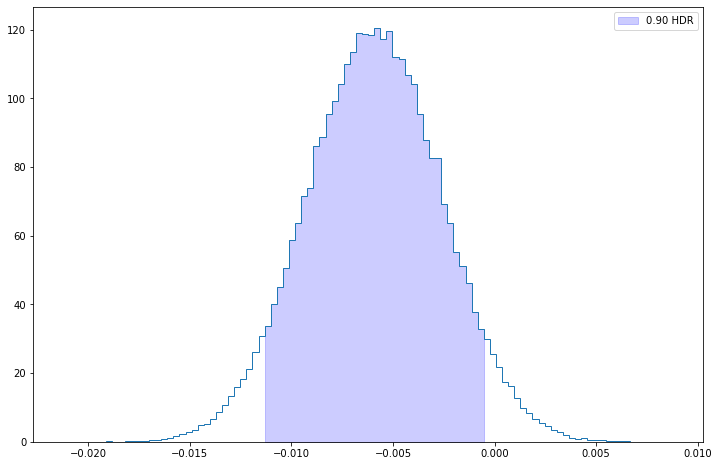

In [53]:
beta = 0.9
prob, bin_edges,_ = plt.hist(r1_diff, bins=100, density=True, histtype='step')
R_intervals, fmax,  i_R_intervals = hdr(prob, bin_edges, beta)
plot_hdr(prob, bin_edges, i_R_intervals, alpha=0.2, color='blue', label = "{:3.2f} HDR".format(beta))
plt.legend();

We see that zero difference lies outside the 0.9 HDR. 

Belowe we repeat this analysis foe day seven retention.

In [54]:
r7_A = get_stats(A.retention_7)
r7_A_post = posterior(*r7_A)
r7_A

(8501, 36198)

In [55]:
r7_B = get_stats(B.retention_7)
r7_B_post = posterior(*r7_B)
r7_B

(8279, 37210)

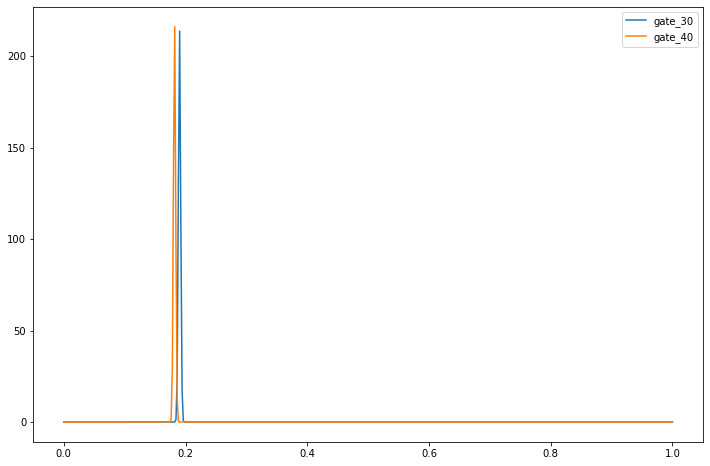

In [56]:
ps=np.linspace(0,1,500)
plt.plot(ps, r7_A_post.pdf(ps), label='gate_30');
plt.plot(ps, r7_B_post.pdf(ps), label='gate_40');
plt.legend();

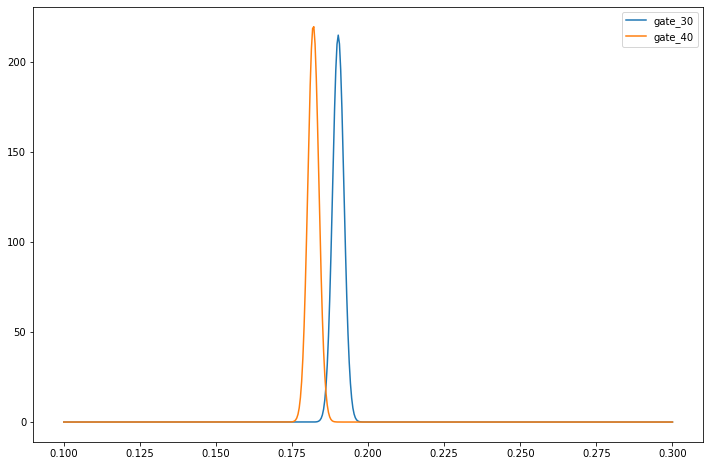

In [57]:
ps=np.linspace(0.1,.3,500)
plt.plot(ps, r7_A_post.pdf(ps),label  = "gate_30");
plt.plot(ps, r7_B_post.pdf(ps), label = "gate_40");
plt.legend();

In [58]:
r7_sample_A = r7_A_post.rvs(size=100000)
r7_sample_B = r7_B_post.rvs(size=100000)
r7_diff = r7_sample_B-r7_sample_A

Text(0, 0.5, 'P(\\Delta r_1)')

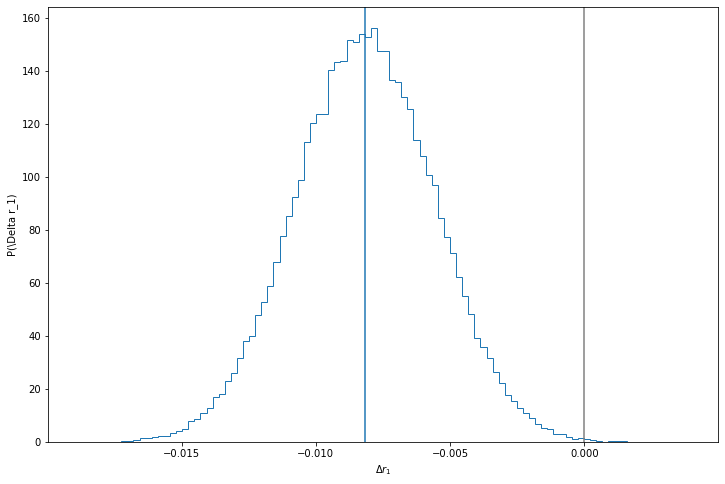

In [59]:
plt.hist(r7_diff, bins=100, density=True, histtype='step');
plt.axvline(r7_diff.mean())
plt.axvline(0, c='grey');
plt.xlabel('$\Delta r_1$')
plt.ylabel('P(\Delta r_1)')

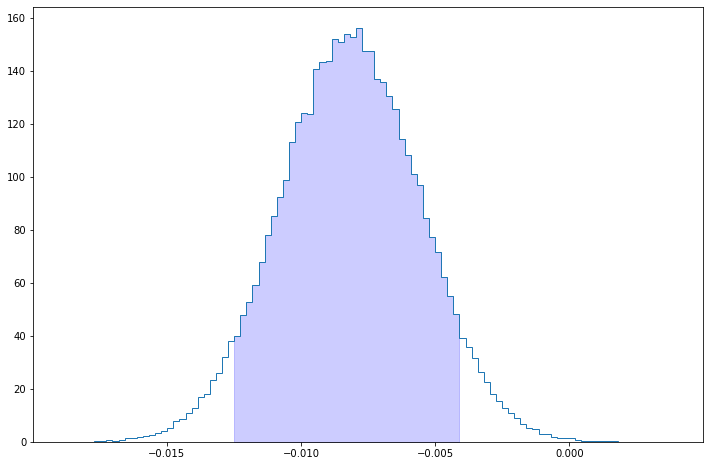

In [60]:
prob, bin_edges,_ = plt.hist(r7_diff, bins=100, density=True, histtype='step')
R_intervals, fmax,  i_R_intervals = hdr(prob, bin_edges, 0.9)
plot_hdr(prob, bin_edges, i_R_intervals, alpha =0.2 , color='blue')

The Monte-Carlo technique is every powerfull and allows for more elaborate analysis. 

__Problem__  Difference between the number of persons playing the game on day one.

Assume that each day 10000 persons on average downloads and installs the game. The distribution of this number is Poisson distribution. Plot the distribution of the number of people that will play the game on day one. 

In [61]:
n_samples = 100000

First we create the Poisson distribution object and use it to generate a sample of number of downloads per day. 

In [62]:
n_average = 10000
n_dist = st.poisson(mu = n_average)
n_in_day = n_dist.rvs(size=n_samples)

Then we simulate same number of retention rates samples

In [63]:
r1_As = r1_A_post.rvs(size=n_samples)
r1_Bs = r1_B_post.rvs(size=n_samples)

We combine  for each sample simulating the binomial distribution with given number of downloads and  given retention rate. 

In [64]:
n_ret1_A = st.binom.rvs(n=n_in_day, p=r1_As, size=n_samples)
n_ret1_B = st.binom.rvs(n=n_in_day, p=r1_Bs, size=n_samples)

And finally we plot the histogram of differences

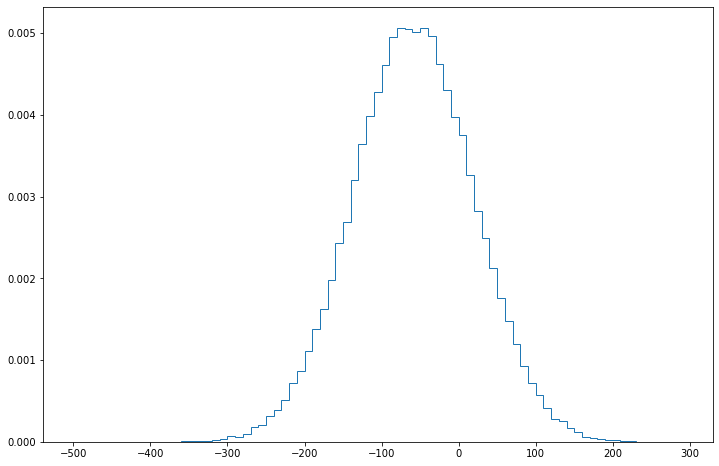

In [65]:
plt.hist(n_ret1_B-n_ret1_A, bins=np.arange(-500,300,10), density=True, histtype='step');